In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
pwd = os.getcwd()

In [8]:
data = pd.read_csv(pwd + '/Data - previous_application.csv')

In [55]:
df1 = data.copy()

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   49999 non-null  int64  
 1   SK_ID_CURR                   49999 non-null  int64  
 2   NAME_CONTRACT_TYPE           49999 non-null  object 
 3   AMT_ANNUITY                  39407 non-null  float64
 4   AMT_APPLICATION              49999 non-null  float64
 5   AMT_CREDIT                   49999 non-null  float64
 6   AMT_DOWN_PAYMENT             24801 non-null  float64
 7   AMT_GOODS_PRICE              39255 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   49999 non-null  object 
 9   HOUR_APPR_PROCESS_START      49999 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  49999 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       49999 non-null  int64  
 12  RATE_DOWN_PAYMENT            24801 non-null  float64
 13  RATE_INTEREST_PR

In [57]:
null= df1.isnull().mean().sort_values(ascending=False)*100
null

RATE_INTEREST_PRIVILEGED       99.669993
RATE_INTEREST_PRIMARY          99.669993
RATE_DOWN_PAYMENT              50.397008
AMT_DOWN_PAYMENT               50.397008
NAME_TYPE_SUITE                48.486970
NFLAG_INSURED_ON_APPROVAL      38.320766
DAYS_FIRST_DRAWING             38.320766
DAYS_FIRST_DUE                 38.320766
DAYS_LAST_DUE_1ST_VERSION      38.320766
DAYS_LAST_DUE                  38.320766
DAYS_TERMINATION               38.320766
AMT_GOODS_PRICE                21.488430
AMT_ANNUITY                    21.184424
CNT_PAYMENT                    21.184424
PRODUCT_COMBINATION             0.016000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_YIELD_GROUP                0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
SK_ID_PREV                      0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REAS

In [58]:
df1 = df1.loc[:, null <= 40]

In [59]:
df1.isnull().mean().sort_values(ascending=False)*100

NFLAG_INSURED_ON_APPROVAL      38.320766
DAYS_LAST_DUE                  38.320766
DAYS_FIRST_DUE                 38.320766
DAYS_LAST_DUE_1ST_VERSION      38.320766
DAYS_FIRST_DRAWING             38.320766
DAYS_TERMINATION               38.320766
AMT_GOODS_PRICE                21.488430
AMT_ANNUITY                    21.184424
CNT_PAYMENT                    21.184424
PRODUCT_COMBINATION             0.016000
NAME_GOODS_CATEGORY             0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_

In [60]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [61]:
#Dropping columns which are of no importance 
drop_col= ["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT",
          "NFLAG_LAST_APPL_IN_DAY","DAYS_DECISION","AMT_APPLICATION","NAME_CASH_LOAN_PURPOSE","SK_ID_PREV","NAME_GOODS_CATEGORY"
          ,"NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP"
          ,"CODE_REJECT_REASON", "PRODUCT_COMBINATION"]
df1 = df1.drop(drop_col,axis=1)

In [62]:
df1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,Cash through the bank,Repeater,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,108129,Cash loans,25188.615,679671.0,607500.0,Approved,XNA,Repeater,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,122040,Cash loans,15060.735,136444.5,112500.0,Approved,Cash through the bank,Repeater,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,176158,Cash loans,47041.335,470790.0,450000.0,Approved,Cash through the bank,Repeater,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,202054,Cash loans,31924.395,404055.0,337500.0,Refused,Cash through the bank,Repeater,24.0,NaN,NaN,NaN,NaN,NaN,NaN


Filling missing Values with Mean

In [23]:
missing_cols = ["AMT_GOODS_PRICE","AMT_ANNUITY","CNT_PAYMENT"]

In [63]:
for i in missing_cols:
    df1[i].fillna(df1[i].mean(), inplace=True)

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_CURR                 49999 non-null  int64  
 1   NAME_CONTRACT_TYPE         49999 non-null  object 
 2   AMT_ANNUITY                49999 non-null  float64
 3   AMT_CREDIT                 49999 non-null  float64
 4   AMT_GOODS_PRICE            49999 non-null  float64
 5   NAME_CONTRACT_STATUS       49999 non-null  object 
 6   NAME_PAYMENT_TYPE          49999 non-null  object 
 7   NAME_CLIENT_TYPE           49999 non-null  object 
 8   CNT_PAYMENT                49999 non-null  float64
 9   DAYS_FIRST_DRAWING         30839 non-null  float64
 10  DAYS_FIRST_DUE             30839 non-null  float64
 11  DAYS_LAST_DUE_1ST_VERSION  30839 non-null  float64
 12  DAYS_LAST_DUE              30839 non-null  float64
 13  DAYS_TERMINATION           30839 non-null  flo

In [65]:
df1['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100

NAME_PAYMENT_TYPE
Cash through the bank                        64.179284
XNA                                          35.178704
Non-cash from your account                    0.572011
Cashless from the account of the employer     0.070001
Name: proportion, dtype: float64

In [66]:
df1['NAME_PAYMENT_TYPE'].replace("XNA","Cash through the bank", inplace=True)
df1['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100

NAME_PAYMENT_TYPE
Cash through the bank                        99.357987
Non-cash from your account                    0.572011
Cashless from the account of the employer     0.070001
Name: proportion, dtype: float64

In [67]:
df1.NAME_CLIENT_TYPE.value_counts(normalize=True)*100

NAME_CLIENT_TYPE
Repeater     72.335447
New          19.096382
Refreshed     8.454169
XNA           0.114002
Name: proportion, dtype: float64

In [68]:
df1['NAME_CLIENT_TYPE'].replace("XNA","Repeater", inplace=True)
df1.NAME_CLIENT_TYPE.value_counts(normalize=True)*100

NAME_CLIENT_TYPE
Repeater     72.449449
New          19.096382
Refreshed     8.454169
Name: proportion, dtype: float64

In [69]:
df1['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

NAME_CONTRACT_TYPE
Consumer loans     47.020940
Cash loans         41.712834
Revolving loans    11.250225
XNA                 0.016000
Name: proportion, dtype: float64

In [70]:
df1['NAME_CONTRACT_TYPE'].replace("XNA","Cash loans", inplace=True)
df1['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

NAME_CONTRACT_TYPE
Consumer loans     47.020940
Cash loans         41.728835
Revolving loans    11.250225
Name: proportion, dtype: float64

UNIVARIATE ANALYSIS

Text(0.5, 0, 'Number of previous loans')

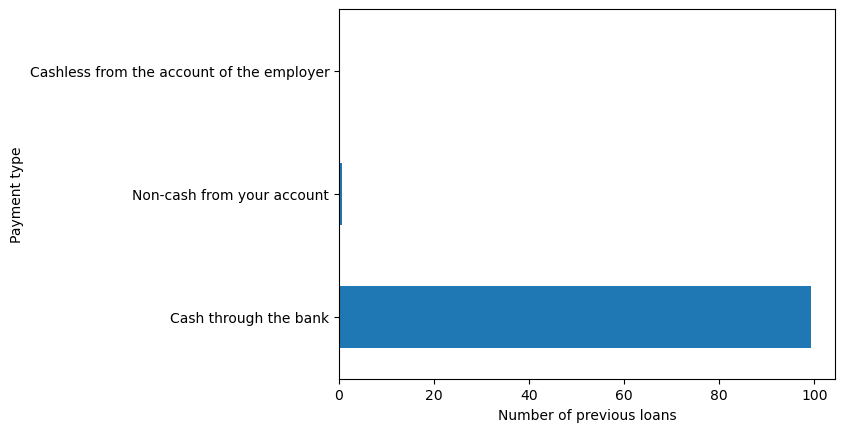

In [71]:
payment_type = df1['NAME_PAYMENT_TYPE'].value_counts(normalize=True)*100
payment_type.plot.barh()
#lt.xticks(rotation=45)
plt.ylabel("Payment type")
plt.xlabel("Number of previous loans")

Text(0, 0.5, 'Number of previous loans')

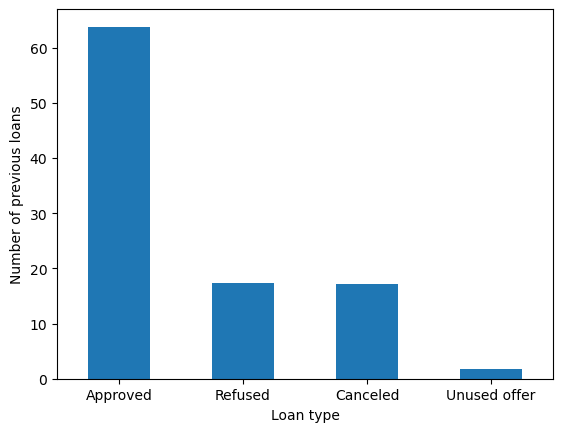

In [72]:
loan_status = df1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100
loan_status.plot.bar()
plt.xticks(rotation=360)
plt.xlabel("Loan type")
plt.ylabel("Number of previous loans")


Text(0, 0.5, 'Number of previous loans')

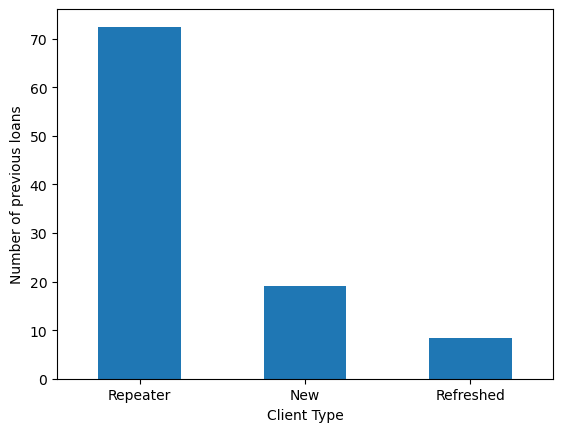

In [73]:
client_type = df1['NAME_CLIENT_TYPE'].value_counts(normalize=True)*100
client_type.plot.bar()
plt.xticks(rotation=360)
plt.xlabel("Client Type")
plt.ylabel("Number of previous loans")

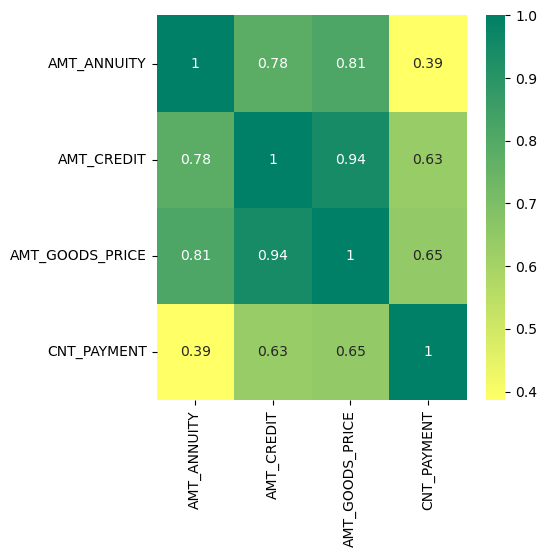

## MERGING DATA

In [76]:
df = pd.read_csv(pwd + '/Data - application.csv')

In [77]:
merge1= pd.merge(left= df[["SK_ID_CURR","TARGET"]], right= df1,how="inner", left_on=["SK_ID_CURR"], right_on = ["SK_ID_CURR"] )

In [78]:
merge1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100007,0,Cash loans,16509.600,180000.0,180000.0,Approved,Cash through the bank,Repeater,18.0,365243.0,-834.0,-324.0,-354.0,-347.0,0.0
1,100009,0,Consumer loans,8996.760,98239.5,98239.5,Approved,Cash through the bank,Repeater,12.0,365243.0,-418.0,-88.0,-88.0,-84.0,0.0
2,100012,0,Consumer loans,3012.075,23697.0,18720.0,Approved,Cash through the bank,New,12.0,365243.0,-1641.0,-1311.0,-1401.0,-1397.0,0.0
3,100026,0,Consumer loans,23608.485,132345.0,132345.0,Approved,Cash through the bank,New,6.0,365243.0,-1396.0,-1246.0,-1246.0,-1243.0,0.0
4,100027,0,Cash loans,22556.475,239850.0,225000.0,Refused,Cash through the bank,Repeater,12.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841 entries, 0 to 6840
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_CURR                 6841 non-null   int64  
 1   TARGET                     6841 non-null   int64  
 2   NAME_CONTRACT_TYPE         6841 non-null   object 
 3   AMT_ANNUITY                6841 non-null   float64
 4   AMT_CREDIT                 6841 non-null   float64
 5   AMT_GOODS_PRICE            6841 non-null   float64
 6   NAME_CONTRACT_STATUS       6841 non-null   object 
 7   NAME_PAYMENT_TYPE          6841 non-null   object 
 8   NAME_CLIENT_TYPE           6841 non-null   object 
 9   CNT_PAYMENT                6841 non-null   float64
 10  DAYS_FIRST_DRAWING         4246 non-null   float64
 11  DAYS_FIRST_DUE             4246 non-null   float64
 12  DAYS_LAST_DUE_1ST_VERSION  4246 non-null   float64
 13  DAYS_LAST_DUE              4246 non-null   float

In [80]:
merge1.describe()

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,6841.000000,6841.000000,6841.000000,6.841000e+03,6.841000e+03,6841.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,129281.024265,0.080982,15394.209691,1.909169e+05,2.150625e+05,15.672111,343502.814178,14530.288507,33044.975035,81038.799576,86056.942534,0.319830
std,16871.202079,0.272828,12701.614880,3.062764e+05,2.658996e+05,12.579127,86560.501394,74017.705257,105813.123420,152703.258108,155891.686427,0.466466
min,100007.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-2910.000000,-2889.000000,-2780.000000,-2780.000000,-2743.000000,0.000000
25%,114825.000000,0.000000,7011.675000,2.693250e+04,6.295500e+04,10.000000,365243.000000,-1597.750000,-1225.000000,-1294.750000,-1250.750000,0.000000
50%,129613.000000,0.000000,14172.210000,8.143650e+04,1.472895e+05,12.000000,365243.000000,-802.000000,-317.500000,-502.000000,-460.000000,0.000000
75%,144026.000000,0.000000,16227.540000,2.025000e+05,2.151414e+05,18.000000,365243.000000,-381.000000,158.750000,-54.000000,-26.000000,1.000000
max,157867.000000,1.000000,132861.510000,3.150000e+06,3.150000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


BIVARIATE ANALYSIS

Text(0.5, 0, 'Client type')

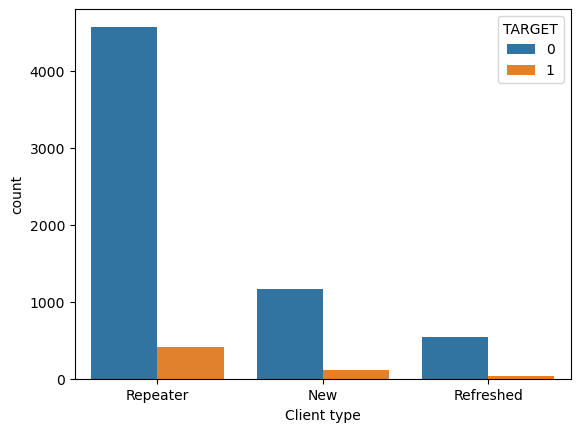

In [82]:
sns.countplot(data=merge1,x="NAME_CLIENT_TYPE", hue="TARGET")
plt.xlabel("Client type")

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

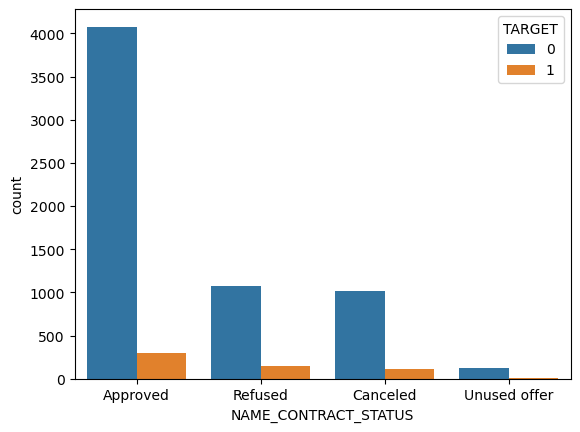

In [83]:
sns.countplot(data=merge1,x="NAME_CONTRACT_STATUS", hue="TARGET")